In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.io as sio
import scipy
from sklearn import neighbors
#%matplotlib inline

In [83]:
def PCA(data,dimensions):
    '''
    data is the original data set，rows are samples of data,columns are the features
    '''
    [N, D] = data.shape
    # making data zero-means
    average = np.mean(data,0)
    data = np.mat(data-average)
    
    #covariance
    covariance = np.dot(data.T, data)
    
    #eigenvalues
    eig_var, eig_vec = np.linalg.eig(covariance)
    
    
    #from the numpy doc, the eig_var may not be ordered.
    sort_eig = np.argsort(-eig_var)
    #return the index that make a sorted array

    #so we got the sorted eig_var
    sort_eig = sort_eig[:dimensions]
    principal_vec = np.mat(eig_vec[:,sort_eig])
    low_data = np.dot(data, principal_vec).astype(float)
    return principal_vec, low_data, average


In [84]:
def FLD(data, label, d):
    # Number of samples N; Dimensions D; Clases c
    [N, D] = data.shape
    c = len(np.unique(label))
    
    
    # W_opt.T = W_fld.T * W_pca.T
    # W_pca
    # Get the principal components of PCA with N-c largest eigenvalues
    W_pca, data_pca, average= PCA(data, N-c)
    
    # W_fld
    # S_B
    
    #total mean
    mean_total = data_pca.mean(axis=0)
    
    S_W = np.zeros((N-c, N-c)) 
    S_B = np.zeros((N-c, N-c))
    
    for i in range(1,c+1):
        # mean of class
       
        data_i = data_pca[np.where(label == i)]
        mean_i = data_i.mean(axis=0)
        S_B = S_B + N * np.dot((mean_i - mean_total).T, mean_i - mean_total)
        S_W = S_W + np.dot((data_i - mean_i).T, (data_i - mean_i))
        
    eigenvalues, eigenvectors = np.linalg.eig(np.dot(np.linalg.inv(S_W), S_B))
    sort_eig = np.argsort(-eigenvalues)
    W_fld = eigenvectors[:, sort_eig[:d]]
   
    W_opt = np.dot(W_pca, W_fld)
    return W_opt

In [85]:
data=sio.loadmat("Yale_32x32.mat")
face = data['fea']/255
label = data['gnd']
label = np.squeeze(label)
print(face.shape)
print(label.shape)
W = FLD(face, label, 14)

(165, 1024)
(165,)


/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


(1024, 14)
(165, 14)


/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


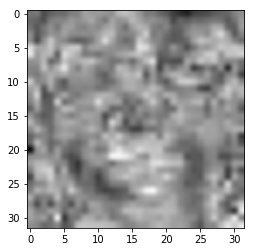

In [94]:
print(W.shape)
print(data_fld.shape)
fisherface=W.T[3]
fisherface=fisherface.reshape(32, 32).astype(float)
pylab.imshow(fisherface.T, cmap='gray', interpolation='hamming')
pylab.show()

In [87]:
def knn_verification(train_data, train_label, test_data, test_label):
    knn = neighbors.KNeighborsClassifier(n_neighbors = 1)  
    knn.fit(train_data, train_label)
    pre = knn.predict(test_data)
    print(pre[0], test_label)
    return pre[0]==test_label

def knn_score(train_data, train_label, test_data, test_label):
    knn = neighbors.KNeighborsClassifier(n_neighbors = 1)  
    knn.fit(train_data, train_label)
    s = knn.score(test_data, test_label)
    return s

In [88]:
def Leaving_one_out():
    ## 32 * 32 Yale_faces 
    s=0.0
    
    for i in range(165):
        index = [i for i in range(165)]
        index.remove(i) 
        trainface = np.squeeze(face[index])
        trainlabel = label[index]
        
        testface = face[i].reshape((1, 32*32))
        testlabel = label[i]
        
        mapping= FLD(trainface, trainlabel, 15)
        #mapping, tmp, tmp_= PCA(trainface, 30)
        traindata = np.dot(trainface, mapping)
        testdata = np.dot(testface, mapping)
        
        if(knn_verification(traindata, trainlabel, testdata, testlabel)==False):
            s+=1
        print(i, s)
    return s/165

s = Leaving_one_out()
print("score" ,s)

/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


1 1
0 0.0
1 1
1 0.0
1 1
2 0.0
1 1
3 0.0
1 1
4 0.0
1 1
5 0.0
4 1
6 1.0
1 1
7 1.0
1 1
8 1.0
1 1
9 1.0
1 1
10 1.0
1 2
11 2.0
2 2
12 2.0
2 2
13 2.0
2 2
14 2.0
2 2
15 2.0
2 2
16 2.0
2 2
17 2.0
2 2
18 2.0
13 2
19 3.0
2 2
20 3.0
2 2
21 3.0
14 3
22 4.0
6 3
23 5.0
3 3
24 5.0
3 3
25 5.0
3 3
26 5.0
3 3
27 5.0
4 3
28 6.0
3 3
29 6.0
3 3
30 6.0
3 3
31 6.0
3 3
32 6.0
4 4
33 6.0
4 4
34 6.0
4 4
35 6.0
3 4
36 7.0
4 4
37 7.0
4 4
38 7.0
3 4
39 8.0
4 4
40 8.0
4 4
41 8.0
4 4
42 8.0
4 4
43 8.0
5 5
44 8.0
5 5
45 8.0
5 5
46 8.0
5 5
47 8.0
5 5
48 8.0
5 5
49 8.0
12 5
50 9.0
5 5
51 9.0
5 5
52 9.0
5 5
53 9.0
5 5
54 9.0
6 6
55 9.0
6 6
56 9.0
6 6
57 9.0
6 6
58 9.0
6 6
59 9.0
6 6
60 9.0
5 6
61 10.0
6 6
62 10.0
6 6
63 10.0
6 6
64 10.0
6 6
65 10.0
7 7
66 10.0
7 7
67 10.0
7 7
68 10.0
7 7
69 10.0
7 7
70 10.0
7 7
71 10.0
7 7
72 10.0
7 7
73 10.0
7 7
74 10.0
13 7
75 11.0
7 7
76 11.0
5 8
77 12.0
15 8
78 13.0
8 8
79 13.0
15 8
80 14.0
8 8
81 14.0
8 8
82 14.0
8 8
83 14.0
8 8
84 14.0
8 8
85 14.0
8 8
86 14.0
8 8
87 14.0
9 9
88 14

In [95]:
data=sio.loadmat("orl_faces/32_32/ORL_32x32.mat")
face = data['fea']/255
face = np.squeeze(face)
label = data['gnd']
label = np.squeeze(label)

s=0.0
for i in range(50):
    matfn = 'orl_faces/32_32/6Train/'+str(i+1)+'.mat'
    index = sio.loadmat(matfn)
    testIdx = index['testIdx'] -1    
    trainIdx = index['trainIdx'] -1

    trainface = np.squeeze(face[trainIdx])
    trainlabel = np.squeeze(label[trainIdx])
    testface = np.squeeze(face[testIdx])
    testlabel = np.squeeze(label[testIdx])
    
    #FLD
    mapping= FLD(trainface, trainlabel, 40)
    #mapping, tmp, tmp_= PCA(trainface, 30)
    traindata = np.dot(trainface, mapping)
    testdata = np.dot(testface, mapping)
   
    tmp=knn_score(traindata, trainlabel, testdata, testlabel)
    s+=tmp
    print(tmp)
print('s', s/50)

/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


0.93125
0.96875
0.95
0.975
0.9375
0.98125
0.94375
0.975
0.925
0.975
0.95
0.95
0.95
0.9625
0.925
0.96875
0.95625
0.9625
0.975
0.975
0.94375
0.94375
0.96875
0.975
0.96875
0.9
0.96875
0.96875
0.95625
0.9375
0.91875
0.9625
0.925
0.9125
0.9375
0.975
0.96875
0.96875
0.94375
0.9375
0.96875
0.975
0.95625
0.94375
0.95
0.9375
0.94375
0.9375
0.9375
0.9375
s 0.952125
